In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/eth_courses/Autumn22/nlp/spanningtrees/

/content/drive/MyDrive/eth_courses/Autumn22/nlp/spanningtrees


In [ ]:
!pip install torch torchtext transformers datasets conllu graphviz 
!pip install git+https://github.com/szagoruyko/pytorchviz
!apt-get install graphviz -u

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./runs

In [ ]:
!tail -f nohup.out

Epoch [2/100]:   5%|▍         | 3/62 [00:04<01:24,  1.43s/it, loss=741]
Traceback (most recent call last):
  File "benji_transformer_play.py", line 506, in <module>
    main2(**vars(args))
  File "benji_transformer_play.py", line 434, in main2
    sentences_embedding, sentences_word_embeddings, targets = get_embeddings(input_data, tokenizer, model)
  File "benji_transformer_play.py", line 288, in get_embeddings
    sentences_word_embeddings[-1].append(last_layers[sentence_i, token_ids].mean(dim=0))
KeyboardInterrupt


In [ ]:
import os
import datetime
SAVEDIR = f"{os.getcwd()}/runs/colab_{datetime.datetime.now().strftime('%m_%d-%H_%M_%S')}"
print(SAVEDIR)
# nope gotta put in SAVEDIR manually !nohup python benji_transformer_play.py --log_dir=SAVEDIR --lr=0.0001 --n_batch=64 --hist_weights_every=10

/content/drive/MyDrive/eth_courses/Autumn22/nlp/spanningtrees/runs/colab_07_21-09_36_01
nohup: ignoring input and appending output to 'nohup.out'


In [ ]:
from benji_transformer_play import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!ls runs/colab_07_21-14_26_16

events.out.tfevents.1658413862.00ceecfeef76.355.0  save_epoch23.pt
save_epoch0.pt					   save_epoch24.pt
save_epoch10.pt					   save_epoch25.pt
save_epoch11.pt					   save_epoch26.pt
save_epoch12.pt					   save_epoch27.pt
save_epoch13.pt					   save_epoch28.pt
save_epoch14.pt					   save_epoch29.pt
save_epoch15.pt					   save_epoch2.pt
save_epoch16.pt					   save_epoch3.pt
save_epoch17.pt					   save_epoch4.pt
save_epoch18.pt					   save_epoch5.pt
save_epoch19.pt					   save_epoch6.pt
save_epoch1.pt					   save_epoch7.pt
save_epoch20.pt					   save_epoch8.pt
save_epoch21.pt					   save_epoch9.pt
save_epoch22.pt


In [ ]:
scorer = Scorer2().to(device)
scorer.load_state_dict(torch.load('runs/colab_07_21-14_26_16/save_epoch29.pt'))


<All keys matched successfully>

In [ ]:
data = datasets.load_dataset("universal_dependencies", "en_gum")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
val_data = [sequence for sequence in data['test'] if len(sequence['tokens']) < 20]
model = AutoModel.from_pretrained("bert-base-cased", output_hidden_states=True).to(device)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/4287 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/784 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/890 [00:00<?, ? examples/s]

Dataset universal_dependencies downloaded and prepared to /root/.cache/huggingface/datasets/universal_dependencies/en_gum/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a12aa417b994e6ef7d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
input_data = val_data[:4]
sentences_embedding, sentences_word_embeddings, targets = get_embeddings(input_data, tokenizer, model)
i = 3
word_embeddings, sentence_embedding, target = sentences_word_embeddings[i], sentences_embedding[i], targets[i]

loss, pred, constr, mst_prob, mst_neg_log_prob, target_prob, target_neg_log_probs = do_train(word_embeddings, sentence_embedding, target, scorer)


In [ ]:
loss, constr, target, target_prob, mst_prob, mst_neg_log_prob, target_neg_log_probs

(tensor(0.0639, device='cuda:0', grad_fn=<NllLossBackward0>),
 array([-1,  3,  3,  0,  6,  6,  3,  8,  6, 10,  3, 12, 10, 10,  3]),
 tensor([ 3,  3,  0,  6,  6,  3,  8,  6, 10,  3, 12, 10, 10,  3],
        device='cuda:0'),
 tensor(nan, device='cuda:0', grad_fn=<ExpBackward0>),
 tensor(nan, device='cuda:0', grad_fn=<ExpBackward0>),
 tensor(nan, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(nan, device='cuda:0', grad_fn=<AddBackward0>))

['Sociologists', 'have', 'explored', 'the', 'adverse', 'consequences', 'of', 'discrimination', '[', '3', '–', '5', ']', ';']


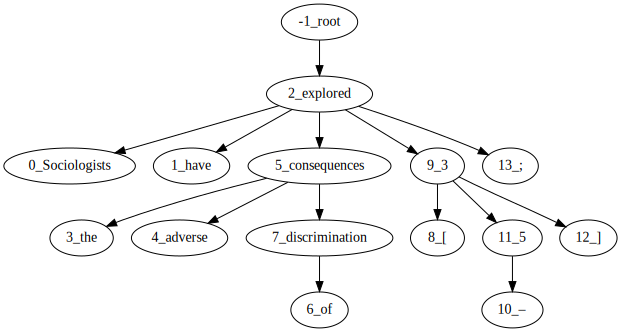

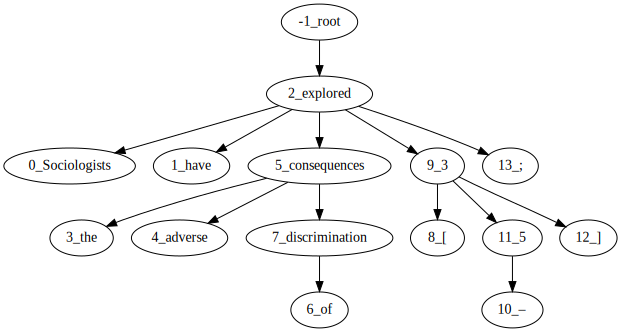

In [ ]:
import graphviz

def get_graphviz(tokens, dep_to_head):
  G = graphviz.Digraph()
  tokens = ['root'] + tokens
  # print(tokens)
  for i, token in enumerate(tokens):
    G.node('q' + str(i), str(i-1) + '_' + token)

  for dep_i, head_i in enumerate(dep_to_head):
    h, d = tokens[head_i], tokens[dep_i + 1]
    # print(h, d)
    G.edge('q' + str(head_i), 'q' + str(dep_i + 1))
  return G


# G = get_graphviz(data['train'][0]['tokens'], list(map(int, data['train'][0]['head'])))
G1 = get_graphviz(input_data[i]['tokens'], constr[1:])
print(input_data[i]['tokens'])
G2 = get_graphviz(input_data[i]['tokens'], list(target.detach().cpu().numpy()))
G1
G2

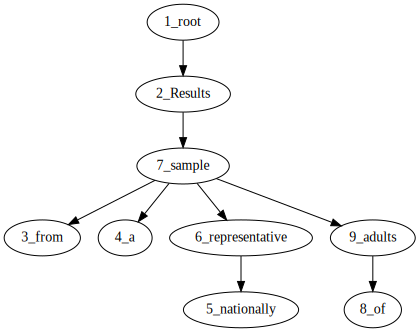

In [ ]:
G2

In [ ]:
import datetime
datetime.datetime.now().strftime('%m_%d-%H_%M_%S')

'07_20-16_53_50'

In [ ]:
!mkdir /content/tblogs

mkdir: cannot create directory ‘/content/tblogs’: File exists


In [ ]:
import os
os.getcwd()

'/content/drive/MyDrive/eth_courses/Autumn22/nlp/spanningtrees'

In [ ]:
import datetime
get_ipython().system_raw(
    'nohup python benji_transformer_play.py --lr=0.001 --n_batch=128 --n_epochs=100 --hist_weights_every=5 --log_dir={} &'
    .format(f"{os.getcwd()}/runs/colab_{datetime.datetime.now().strftime('%m_%d-%H_%M_%S')}")
)


In [ ]:
FOO = f"asdf{3}"
!echo FOO

FOO


In [ ]:
!tail -f nohup.out

SyntaxError: ignored

In [ ]:
!nohup python benji_transformer_play.py --log_dir="/content/tblogs/07_20-16_50_40" &

nohup: appending output to 'nohup.out'


In [ ]:
!jobs

                                 hist_weights_every
benji_transformer_play.py: error: the following arguments are required: hist_weights_every
usage: benji_transformer_play.py [-h] [--lr LR] [--n_batch N_BATCH]
                                 [--n_epochs N_EPOCHS] [--log_dir LOG_DIR]
                                 hist_weights_every
benji_transformer_play.py: error: the following arguments are required: hist_weights_every
Downloading: 100%|██████████| 29.0/29.0 [00:00<00:00, 24.3kB/s]
Downloading: 100%|██████████| 570/570 [00:00<00:00, 493kB/s]
Downloading: 100%|██████████| 208k/208k [00:00<00:00, 246kB/s]
Downloading: 100%|██████████| 426k/426k [00:01<00:00, 400kB/s]
Downloading: 100%|██████████| 416M/416M [00:06<00:00, 72.2MB/s]
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.pr

In [ ]:
main2(n_batch=128, log_dir='/content/tblogs/' + datetime.datetime.now().strftime('%m_%d-%H_%M_%S'))

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [5/20]:  16%|█▌        | 5/31 [00:13<01:11,  2.76s/it, loss=236]


KeyboardInterrupt: ignored

In [ ]:
LOG_DIR='/content/tblogs/'
# get_ipython().system_raw(
#     'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
#     .format(LOG_DIR)
# )
%load_ext tensorboard
%tensorboard --logdir /content/tblogs

In [ ]:
!python benji_transformer_play.py

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Reusing dataset universal_dependencies (/root/.cache/huggingface/datasets/universal_dependencies/en_gum/2.7.0/065e728dfe9a8371434a6e87132c2386a6eacab1a076d3a

In [ ]:
!ls runs/Jul20_16*

runs/Jul20_16-01-32_LAPTOP-U8EUTPL7:
events.out.tfevents.1658325692.LAPTOP-U8EUTPL7.3728.0

runs/Jul20_16-14-36_LAPTOP-U8EUTPL7:
events.out.tfevents.1658326476.LAPTOP-U8EUTPL7.6764.0

runs/Jul20_16-15-45_LAPTOP-U8EUTPL7:
events.out.tfevents.1658326545.LAPTOP-U8EUTPL7.6792.0

runs/Jul20_16-26-08_LAPTOP-U8EUTPL7:
events.out.tfevents.1658327168.LAPTOP-U8EUTPL7.15440.0

runs/Jul20_16-31-39_LAPTOP-U8EUTPL7:
events.out.tfevents.1658327499.LAPTOP-U8EUTPL7.14996.0

runs/Jul20_16-32-35_LAPTOP-U8EUTPL7:
events.out.tfevents.1658327555.LAPTOP-U8EUTPL7.19316.0

runs/Jul20_16-33-21_LAPTOP-U8EUTPL7:
events.out.tfevents.1658327601.LAPTOP-U8EUTPL7.4780.0

runs/Jul20_16-37-42_LAPTOP-U8EUTPL7:
events.out.tfevents.1658327862.LAPTOP-U8EUTPL7.8272.0


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
!cat benji_transformer_play.py

from typing import List, Tuple

import numpy as np
import torch
import tqdm
from transformers import AutoTokenizer, AutoModel
import datasets

from torch import nn
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

from spanningtrees.mst import MST

torch.manual_seed(42)
np.random.seed(42)


def get_word_idx(sent: str, word: str):
    return sent.split(" ").index(word)


def get_hidden_states(encoded, token_ids_word, model, layers,):
    """Push input IDs through model. Stack and sum `layers` (last four by default).
       Select only those subword token outputs that belong to our word of interest
       and average them."""
    with torch.no_grad():
        output = model(**encoded)

    # Get all hidden states
    states = output.hidden_states
    # Stack and sum all requested layers
    output = torch.stack([states[i] for i in layers]).sum(0).squeeze()
    # Only select the tokens that constitute the requested word
    word_tokens_output = output[toke

In [ ]:
scorer = Scorer2()
scorer = scorer.to('cuda')

In [ ]:
data = datasets.load_dataset("universal_dependencies", "en_gum")
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
training_data = [sequence for sequence in data['train'] if len(sequence['tokens']) < 40]

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
sentences = [a['text'] for a in training_data[:4]]
batch_encoded = tokenizer(sentences, padding="longest", return_tensors="pt", truncation=True)

In [ ]:

batch_encoded['input_ids'] = batch_encoded['input_ids'].to('cuda')

In [ ]:
batch_encoded

In [ ]:
import torch
device = 'cuda'
for key in ['input_ids', 'token_type_ids', 'attention_mask']:
    batch_encoded[key] = batch_encoded[key].to(device)

# replacing some tokens with unkown - regularisation?
p_unk_dropout = 0.25
stay_same = torch.rand(batch_encoded['input_ids'].shape) > p_unk_dropout
is_padding = batch_encoded['input_ids'] == tokenizer.pad_token_id
batch_encoded['input_ids'] = torch.where(torch.logical_or(stay_same, is_padding), batch_encoded['input_ids'],
                                      tokenizer.unk_token_id)

RuntimeError: ignored